# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [6]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [7]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [9]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [11]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(browser.html, 'html.parser')

In [12]:
# Extract all rows of data
rows = soup.find_all('tr', class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [14]:
# Create an empty list
data_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cols = row.find_all('td')  # Indent this line
    row_data = [col.text.strip() for col in cols]  # Indent this line
    data_list.append(row_data)  # Indent this line

In [15]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_list, columns=[
    "id", "terrestrial_date", "sol", "ls",
    "month", "min_temp", "pressure"
])

In [16]:
# Confirm DataFrame was created successfully
df = df.assign(
            terrestrial_date=pd.to_datetime(df.terrestrial_date),
            sol=df.sol.astype('int'),
            ls=df.ls.astype('int'),
            month=df.month.astype('int'),
            min_temp=df.min_temp.astype('float'),
            pressure=df.pressure.astype('float')
        )
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [18]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.4+ KB


In [19]:
# Change data types for data analysis
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])

In [20]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 80.4+ KB


In [21]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [23]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"\nNumber of Martian months: {num_months}")


Number of Martian months: 12


In [24]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique()
print(f"Number of Martian days (sols): {num_sols}")

Number of Martian days (sols): 1867


In [25]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [35]:
# 3. What is the average minimum temperature by month?
df2 = df.groupby('month')['min_temp'].mean()

In [37]:
print(df2)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


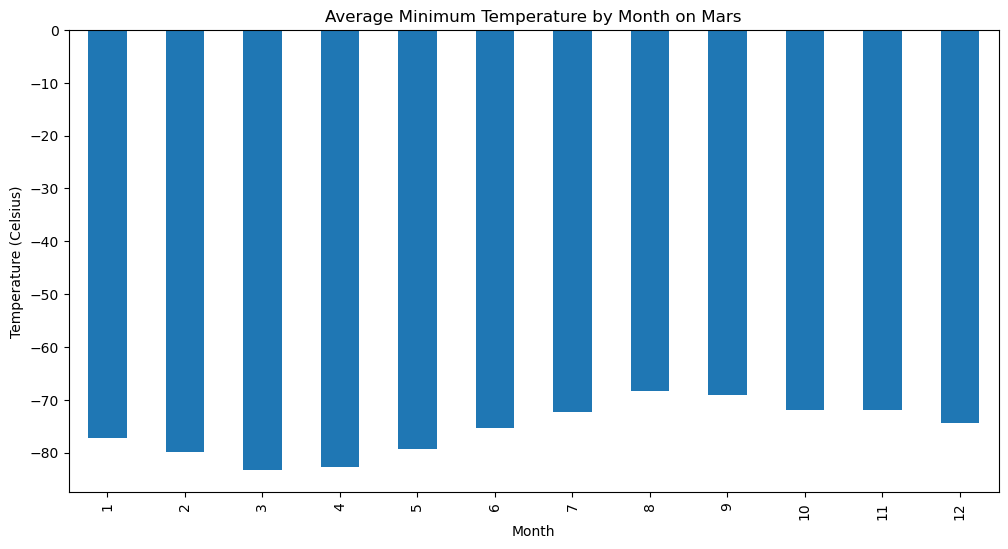

In [43]:
# Plot the average minimum temperature by month
plt.figure(figsize=(12, 6))
df2.plot(kind='bar')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.savefig('mars_temperatures.png')
plt.show()

In [45]:
df2.head()

month
1   -77.160920
2   -79.932584
3   -83.307292
4   -82.747423
5   -79.308725
Name: min_temp, dtype: float64

In [47]:
df2.sort_values(ascending=True)

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

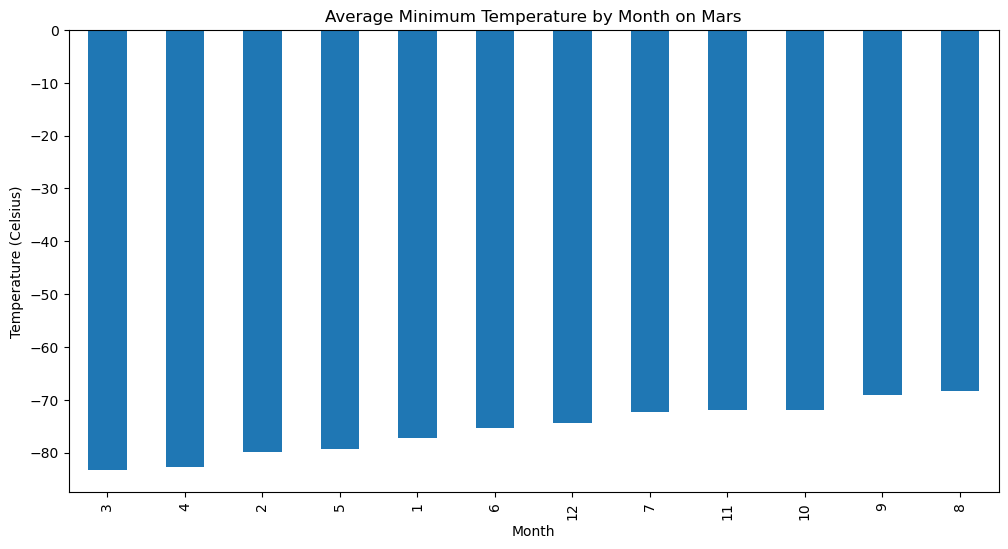

In [49]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
plt.figure(figsize=(12, 6))
df2.sort_values(ascending=True).plot(kind="bar")
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.savefig('mars_temperatures.png')
plt.show()

In [51]:
# 4. What is the average pressure by month?
df2 = df.groupby('month')['pressure'].mean()

In [53]:
print(df2)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


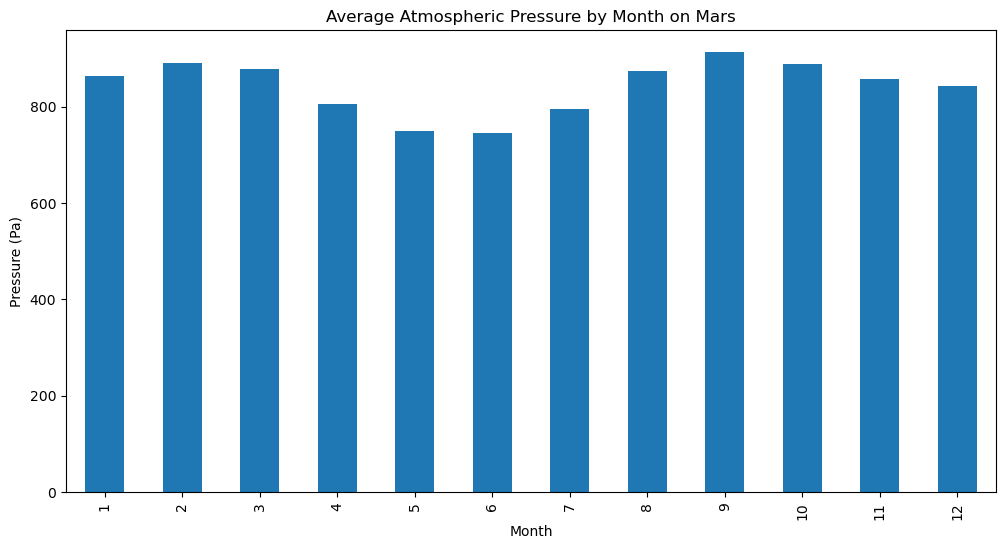

In [55]:
# Plot the average pressure by month
plt.figure(figsize=(12, 6))
df2.plot(kind='bar')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Pressure (Pa)')
plt.savefig('mars_pressure.png')
plt.show()

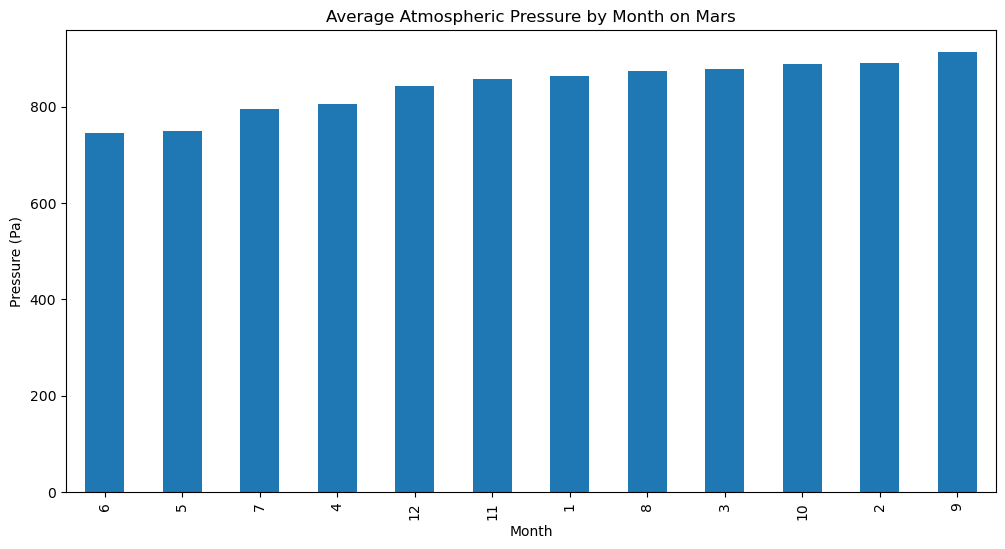

In [57]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
plt.figure(figsize=(12, 6))
df2.sort_values(ascending=True).plot(kind="bar")
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Pressure (Pa)')
plt.savefig('mars_pressure.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

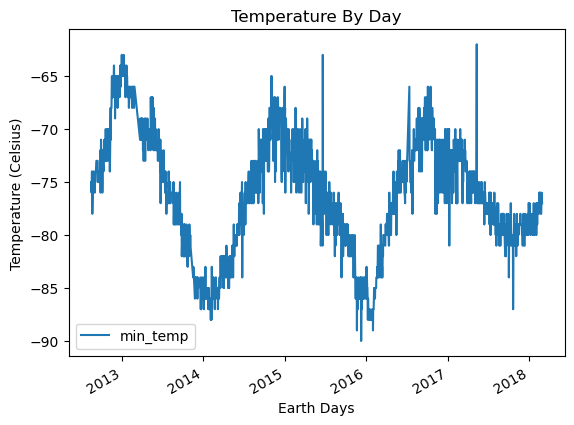

In [59]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(12, 6))
df.plot(x='terrestrial_date', y='min_temp')
plt.title('Temperature By Day')
plt.xlabel('Earth Days')
plt.ylabel('Temperature (Celsius)')
plt.savefig('mars_year_length.png')
plt.show()

#### Minimum Temperature

Based on my analysis, the coldest months are March and April and the the hottest months are September and August.

#### Atmospheric Pressure

Based on my analysis, the lowest pressure months are May and June. The highest pressure months are February and September.

#### Year Length

Based on my data analysis above, there is approximately 680 Earth days in one Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [65]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [67]:
browser.quit()